# America's favourite Star Wars movie - analysing FiveThirtyEight's Star Wars survey


## Project Introduction
This project will look at the responses to a Star Wars survey conducted by FiveThirtyEight. The 2014 survey asked respondents who had seen at least one Star Wars movie, which was their favourite movie and questions about the likeability of different characters from the movies.

The survey was carried out in advance of the release of Star Wars: The Force Awakens, with the team at FiveTirtyEight wondering: [does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)

## Methodology
The data comes from FiveThirtyEight's github [repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). The initial ETL steps were based off dataquest project instructions, however these have been expanded upon and modified to make a more complete and rounded project.

This analysis will use descriptive statistics and data visualisation to answer the following key questions:

1. [What is the highest ranked movie?](#q_1)
2. [What is the most viewed movie?](#q_2)
3. [Who are the most and least popular characters?](#q_3)
4. [Which character is the most controversial?](#q_4)
5. [Do the movie rankings and viewing popularity differ by gender?](#q_5)
6. [Are the demographics of fans different from non-fans?](#q_6)

## Results

1. Star Wars Episode V: The Empire Strikes Back is the highest ranked movie, confirming FiveThirtyEight's initial hypothesis.

2. Unsurprisingly the most viewed movie was also Star Wars Episode V: The Empire Strikes Back.

3. The most popular character was Han Solo whislt the least popular was Jar Jar Binks.

4. Jar Jar Binks and Emporer Palpatine are the most controversial characters with similar numbers of favourable and unfavourable ratings from respondents.

5. Star Wars episode V is the most popular movie for both genders and is also the movie which has been seen the most. However there are some differences with females, on average, ranking episode 1 more highly than episode 4, whilst the opposite is true for males. More males than females have seen the latest movies (epsidoes 1-3) and yet males rank these films worse, on average, than females.

6. Self-identified Star Wars fans are more likely, than non-fans, to be younger, male, educated to a higher degree level, and from households with higher incomes.


## Reading in the data and initial exploration

In [63]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

pd.set_option('display.max_columns', 35)
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,...,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,...,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


Some of the respondent IDs are NaN when they are meant to be a unique number, and so rows with these invalid IDs need to be removed from the dataset. e.g. the first row is evidently the answer box headings and not a  survey response.

Some questions have responses across multiple boxes and so these will need to be aggregated.

In [64]:
#Firstly a list of the answer box headings in row 0 will be created
additional_headings = star_wars.iloc[0].values
print(additional_headings)

[nan 'Response' 'Response' 'Star Wars: Episode I  The Phantom Menace'
 'Star Wars: Episode II  Attack of the Clones'
 'Star Wars: Episode III  Revenge of the Sith'
 'Star Wars: Episode IV  A New Hope'
 'Star Wars: Episode V The Empire Strikes Back'
 'Star Wars: Episode VI Return of the Jedi'
 'Star Wars: Episode I  The Phantom Menace'
 'Star Wars: Episode II  Attack of the Clones'
 'Star Wars: Episode III  Revenge of the Sith'
 'Star Wars: Episode IV  A New Hope'
 'Star Wars: Episode V The Empire Strikes Back'
 'Star Wars: Episode VI Return of the Jedi' 'Han Solo' 'Luke Skywalker'
 'Princess Leia Organa' 'Anakin Skywalker' 'Obi Wan Kenobi'
 'Emperor Palpatine' 'Darth Vader' 'Lando Calrissian' 'Boba Fett' 'C-3P0'
 'R2 D2' 'Jar Jar Binks' 'Padme Amidala' 'Yoda' 'Response' 'Response'
 'Response' 'Response' 'Response' 'Response' 'Response' 'Response'
 'Response']


In [65]:
#Removing rows with invalid RespondentIDs
old_rows = star_wars.shape[0]
print("The old dataframe has {0} rows".format(old_rows))

star_wars = star_wars[star_wars['RespondentID'].notnull()]
#Or star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

new_rows = star_wars.shape[0]
print("The updated dataframe has {0} rows".format(new_rows))

#Check no rows with NaN values for RespondentID
print(star_wars['RespondentID'].isnull().sum())

The old dataframe has 1187 rows
The updated dataframe has 1186 rows
0


In [66]:
# Review column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

If used, the column: 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦' may be renamed as the last characters have not been converted correctly.

## Cleaning and mapping Yes/No columns

There are five columns in the survey with Yes/No responses. To make them easier to analyse they will be converted into boolean type.

In [67]:
#Confirming that all five columns are Yes/No columns
i_list = [1,2,30,31,32] #List of columns by integer

for i in i_list:
    print(star_wars.columns[i])
    print(star_wars[star_wars.columns[i]].value_counts(dropna=False))

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
Are you familiar with the Expanded Universe?
No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64
Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
NaN    973
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦, dtype: int64
Do you consider yourself to be a fan of the Star Trek franchise?
No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


In [68]:
#To convert to boolean use series.map(), firstly create mapping dictionary
yes_no = {
    "Yes": True,
    "No": False
}

for i in i_list:
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(yes_no)
    print(star_wars.columns[i])
    print(star_wars[star_wars.columns[i]].value_counts(dropna=False)) #Check mapping has worked
    print('\n')

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Are you familiar with the Expanded Universe?
False    615
NaN      358
True     213
Name: Are you familiar with the Expanded Universe?, dtype: int64


Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
NaN      973
False    114
True      99
Name: Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦, dtype: int64


Do you consider yourself to be a fan of the Star Trek franchise?
False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64




In [69]:
#Quickly rename one column due to odd characters in the title
star_wars.rename(columns={'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'Do you consider yourself to be a fan of the Expanded Universe?'}, inplace=True)

So the Yes/No columns have now been converted into boolean which makes analysis easier.

## Cleaning and mapping the checkbox columns

The next six columns look at each of the 6 Star Wars films (as at 2014) and ask respondents whether they have seen them.

The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. The assumption made will be that NaN means the respondent didn't see the movie.

To make analysis easier these columns will be converted into boolean, and the columns will be renamed.

In [70]:
#Firstly to see the responses made in each column so can map correctly
j_list = [3,4,5,6,7,8] #List of columns by integer

for j in j_list:
    print(star_wars.columns[j])
    print(star_wars[star_wars.columns[j]].value_counts(dropna=False))
    print('\n')

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64




In [71]:
#To convert to boolean use series.map(), firstly create mapping dictionary
import numpy as np
film_dict={
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

#Now map film_dict across to columns

for j in j_list:
    star_wars[star_wars.columns[j]] = star_wars[star_wars.columns[j]].map(film_dict)
    print(star_wars[star_wars.columns[j]].value_counts(dropna=False))
    print('\n')


True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




Now to **rename the columns**:

In [72]:
#Get list of column names

for j in j_list:
    print(star_wars.columns[j])

Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8


In [73]:
#Create mapper
col_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': "seen_ep1",
    'Unnamed: 4': "seen_ep2",
    "Unnamed: 5": "seen_ep3",
    "Unnamed: 6": "seen_ep4",
    "Unnamed: 7": "seen_ep5",
    "Unnamed: 8": "seen_ep6"
}

star_wars = star_wars.rename(columns=col_dict)

#Check renaming worked
for j in j_list:
    print(star_wars.columns[j])

seen_ep1
seen_ep2
seen_ep3
seen_ep4
seen_ep5
seen_ep6


In [74]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,...,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,...,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,...,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the ranking columns

There are two types of ranking columns:

a) Numerical. e.g. The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

These columns shouldn't require much cleaning, just casting to float for easier analysis.

b) Non-numerical: A series of columns that record responses to the question: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.

To enable further analysis these columns will require mapping.

Addressing these two types in turn.

### a. Numerical ranking columns

In [75]:
#Firstly to see the responses made in each column so can map correctly
k_list = [9,10,11,12,13,14]

for k in k_list:
    print(star_wars.columns[k])
    print(star_wars[star_wars.columns[k]].value_counts(dropna=False))
    print('\n')

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
NaN    351
4      237
6      168
3      130
1      129
5      100
2       71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64


Unnamed: 10
NaN    350
5      300
4      183
2      116
3      103
6      102
1       32
Name: Unnamed: 10, dtype: int64


Unnamed: 11
NaN    351
6      217
5      203
4      182
3      150
2       47
1       36
Name: Unnamed: 11, dtype: int64


Unnamed: 12
NaN    350
1      204
6      161
2      135
4      130
3      127
5       79
Name: Unnamed: 12, dtype: int64


Unnamed: 13
NaN    350
1      289
2      235
5      118
3      106
4       47
6       41
Name: Unnamed: 13, dtype: int64


Unnamed: 14
NaN    350
2      232
3      220
1      146
6      145
4       57
5       36
Name: Unnamed: 14, dtype: int64




In [76]:
#Cast the selected columns to type float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [77]:
#Check the first few columns to see
star_wars[star_wars.columns[9:15]].head(5)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [78]:
#Now to change the column names to make them clearer
#First get a list of the column names

star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [79]:
col_dict_2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking_ep1",
    'Unnamed: 10': 'ranking_ep2',
    'Unnamed: 11': 'ranking_ep3',
    'Unnamed: 12': 'ranking_ep4',
    'Unnamed: 13': 'ranking_ep5',
    'Unnamed: 14': 'ranking_ep6'
}

star_wars = star_wars.rename(columns=col_dict_2)

#Check that it's worked
for k in k_list:
    print(star_wars.columns[k])
    
star_wars[star_wars.columns[9:15]].head(5)

ranking_ep1
ranking_ep2
ranking_ep3
ranking_ep4
ranking_ep5
ranking_ep6


,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


### b. Non-numerical ranking columns

In [80]:
#Firstly to see the responses made in each column so can map correctly
l_list = list(range(15,29,1))

for l in l_list:
    print(star_wars.columns[l])
    print(star_wars[star_wars.columns[l]].value_counts(dropna=False))
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64


Unnamed: 16
Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int6

To make this easier to analyse we will map these responses to numbers, and the cast the columns to type float.

In [81]:
responses_dict = {
    'Very favorably': 2,
    'Somewhat favorably': 1,
    'Somewhat unfavorably': -1,
    'Very unfavorably': -2,
    'Neither favorably nor unfavorably (neutral)': 0,
    'Unfamiliar (N/A)': 0,
    np.NaN: 0 
}

for l in l_list:
    star_wars[star_wars.columns[l]] = star_wars[star_wars.columns[l]].map(responses_dict)
    print(star_wars.columns[l])
    print(star_wars[star_wars.columns[l]].value_counts(dropna=False)) #Check that it's worked
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
 2    610
 0    416
 1    151
-1      8
-2      1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64


Unnamed: 16
 2    552
 0    399
 1    219
-1     13
-2      3
Name: Unnamed: 16, dtype: int64


Unnamed: 17
 2    547
 0    411
 1    210
-1     12
-2      6
Name: Unnamed: 17, dtype: int64


Unnamed: 18
 0    550
 1    269
 2    245
-1     83
-2     39
Name: Unnamed: 18, dtype: int64


Unnamed: 19
 2    591
 0    421
 1    159
-1      8
-2      7
Name: Unnamed: 19, dtype: int64


Unnamed: 20
 0    741
 1    143
-2    124
 2    110
-1     68
Name: Unnamed: 20, dtype: int64


Unnamed: 21
 0    454
 2    310
 1    171
-2    149
-1    102
Name: Unnamed: 21, dtype: int64


Unnamed: 22
 0    750
 1    223
 2    142
-1     63
-2      8
Name: Unnamed: 22, dtype: int64


Unnamed: 23
 0    754
 1    153
 2

In [82]:
#Cast the selected columns to type float
star_wars[star_wars.columns[l_list]] = star_wars[star_wars.columns[l_list]].astype(float)
star_wars[star_wars.columns[l_list]].head(4)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


In [83]:
#Now to rename the columns so that we can easily associate the score with each character
print(additional_headings[l_list])
print(star_wars.columns[l_list])

['Han Solo' 'Luke Skywalker' 'Princess Leia Organa' 'Anakin Skywalker'
 'Obi Wan Kenobi' 'Emperor Palpatine' 'Darth Vader' 'Lando Calrissian'
 'Boba Fett' 'C-3P0' 'R2 D2' 'Jar Jar Binks' 'Padme Amidala' 'Yoda']
Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


In [84]:
#Create a column mapping dictionary

col_dict_3 = {}

for l in l_list:
    key = star_wars.columns[l]
    value = additional_headings[l]
    col_dict_3[key] = value

print(col_dict_3)

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo', 'Unnamed: 16': 'Luke Skywalker', 'Unnamed: 17': 'Princess Leia Organa', 'Unnamed: 18': 'Anakin Skywalker', 'Unnamed: 19': 'Obi Wan Kenobi', 'Unnamed: 20': 'Emperor Palpatine', 'Unnamed: 21': 'Darth Vader', 'Unnamed: 22': 'Lando Calrissian', 'Unnamed: 23': 'Boba Fett', 'Unnamed: 24': 'C-3P0', 'Unnamed: 25': 'R2 D2', 'Unnamed: 26': 'Jar Jar Binks', 'Unnamed: 27': 'Padme Amidala', 'Unnamed: 28': 'Yoda'}


In [85]:
#Now rename the columns
star_wars = star_wars.rename(columns=col_dict_3)

star_wars[star_wars.columns[l_list]].head(4) #Check that it's worked

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


## Analysis

Before commencing the analysis the respondents who answered Question 1 (* Have you seen any of the 6 films in the Star Wars franchise?)*  as a No will have their responses removed from this dataframe. That's because when cleaning the columns, some of their NaN responses will have been converted to 'No', and this will distort the analysis.

In [86]:
find_false = star_wars[star_wars.columns[1]] == False

#Create a new df with the responses of those who have not seen Star Wars
star_wars_not_seen = star_wars[find_false].copy()

print(star_wars_not_seen.head(4))
print('Number of rows is {0}'.format(star_wars_not_seen.shape[0]))

    RespondentID  \
2   3.292880e+09   
12  3.292635e+09   
26  3.292448e+09   
35  3.292298e+09   

    Have you seen any of the 6 films in the Star Wars franchise?  \
2                                               False              
12                                              False              
26                                              False              
35                                              False              

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
2                                                 NaN                      
12                                                NaN                      
26                                                NaN                      
35                                                NaN                      

    seen_ep1  seen_ep2  seen_ep3  seen_ep4  seen_ep5  seen_ep6  ranking_ep1  \
2      False     False     False     False     False     False          NaN   
12     False     Fa

So 250 of the survey respondents had not seen any of the 6 Star Wars films.

In [87]:
# Now to remove these rows from the main df
bool = star_wars[star_wars.columns[1]] == True

print('The number of rows in the original df were {0}'.format(star_wars.shape[0]))
star_wars = star_wars[bool]

print('Number of rows in the revised df are {0}'.format(star_wars.shape[0]))

The number of rows in the original df were 1186
Number of rows in the revised df are 936


As expected the number of rows in the new dataframe has dropped by 250 by removing the No responses to Question 1.

In [88]:
star_wars.reset_index(drop=True, inplace=True)
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6,Han Solo,Luke Skywalker,...,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,2.0,2.0,...,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
2,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,2.0,2.0,...,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
3,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,2.0,1.0,...,1.0,0.0,2.0,1.0,1.0,-2.0,1.0,1.0,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Q1. What is the highest ranked movie? <a id='q_1'></a>

In [89]:
#Compute the mean of the movies to see which one has the lowest score as 1 is the highest score
star_wars[star_wars.columns[9:15]].mean()

ranking_ep1    3.732934
ranking_ep2    4.087321
ranking_ep3    4.341317
ranking_ep4    3.272727
ranking_ep5    2.513158
ranking_ep6    3.047847
dtype: float64

In [90]:
#Now to graph it
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

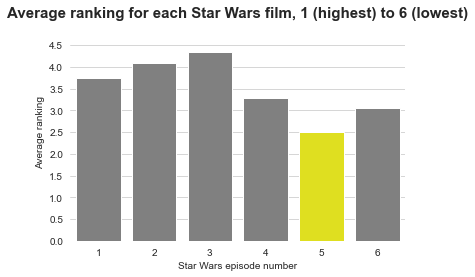

In [91]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
colors=('yellow' if x == min(star_wars[star_wars.columns[9:15]].mean()) else 'grey' for x in star_wars[star_wars.columns[9:15]].mean())
ax = sns.barplot(x= [1,2,3,4,5,6], y=star_wars[star_wars.columns[9:15]].mean(), palette=colors)
ax.set_title('Average ranking for each Star Wars film, 1 (highest) to 6 (lowest)', fontweight='bold', fontsize=15)
y_tic = np.arange(0,5,0.5)
ax.set(ylim=(0,5), ylabel='Average ranking', xlabel='Star Wars episode number', yticks=y_tic)
sns.despine(left=True, bottom=True)

So the highest ranked Star Wars movie is episode V The Empire Strikes Back. In general the highest ranked movies are the oldest ones. This may be because of the age of survey respondents (older viewers may have a preference for the earlier films) or it could be because the older films have been viewed more.

## Q2. What is the most viewed movie? <a id='q_2'></a>

In [92]:
star_wars[star_wars.columns[3:9]].sum()

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

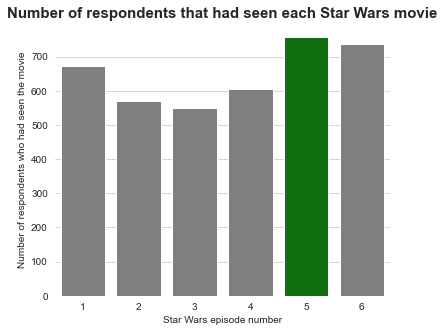

In [93]:
fig, ax = plt.subplots(figsize=(6,5))
colors = ('green' if x == max(star_wars[star_wars.columns[3:9]].sum()) else 'grey' for x in star_wars[star_wars.columns[3:9]].sum())
ax= sns.barplot(x=[1,2,3,4,5,6], y=star_wars[star_wars.columns[3:9]].sum(), palette=colors)
ax.set_title('Number of respondents that had seen each Star Wars movie', fontweight='bold', fontsize=15)
ax.set(xlabel='Star Wars episode number', ylabel='Number of respondents who had seen the movie')
sns.despine(bottom=True, left=True)

So unsurprisingly the highest ranked movie is the most viewed movie. This makes sense as fans are likely to watch their favourite movie the most.

## Q3. Who are the most and least popular characters? <a id='q_3'></a>

In [94]:
l_list = list(range(15,29,1))

characters_rating = star_wars[star_wars.columns[l_list]].sum().sort_values(ascending=False)
print(characters_rating)

Han Solo                1361.0
Yoda                    1330.0
Obi Wan Kenobi          1319.0
Luke Skywalker          1304.0
R2 D2                   1287.0
Princess Leia Organa    1280.0
C-3P0                   1140.0
Anakin Skywalker         598.0
Lando Calrissian         428.0
Padme Amidala            393.0
Darth Vader              391.0
Boba Fett                243.0
Emperor Palpatine         47.0
Jar Jar Binks           -156.0
dtype: float64


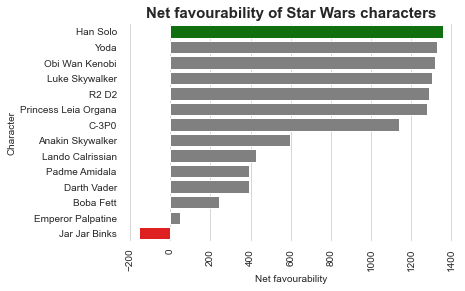

In [95]:
fig, ax = plt.subplots()

colors = ("green" if x == max(characters_rating) else "red" if x == min(characters_rating) else "grey" for x in characters_rating)
ax = sns.barplot(y=characters_rating.index, x=characters_rating, palette = colors, orient="h")
for item in ax.get_xticklabels(): item.set_rotation(90)
ax.set_title('Net favourability of Star Wars characters', fontweight='bold', fontsize=15)
ax.set(ylabel='Character', xlabel='Net favourability')
sns.despine(bottom=True, left=True)

So Han Solo is the most popular character with the highest net favourability score. The most popular characters tend to be the ones from the original 3 films, this is unsurprising as these films were both the most viewed and highly ranked.

The least popular character was Jar Jar Binks, who has a lower favourability than , dark lord of the Sith, Emporer Palpatine! Jar Jar Binks is well-known for being one of the most [disliked film characters](https://abcnews.go.com/Entertainment/Movies/top-10-worst-tv-film-characters-time/story?id=10809609) so his low score is expected, but is still very low compared to other characters.

## Q4. Which character is the most controversial? <a id='q_4'></a>

Whilst the above analysis shows us the net favourability of each character it will be interesting to know which characters cause the most divided opinions. Controversial characters are the ones with the closest split between likes and dislikes.

In [96]:
# Creating a df to analyse just the characters

characters = star_wars[star_wars.columns[15:29]]

characters.head(4)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0
3,2.0,1.0,1.0,-1.0,2.0,-2.0,1.0,0.0,2.0,1.0,1.0,-2.0,1.0,1.0


In [97]:
# Define a function to convert the scores into likes and dislikes

def like_dislike(val):
    if val > 0:
        return 'like'
    elif val < 0:
        return 'dislike'
    else: 
        return 'neutral'

# Apply the function to the characters df element-wise
characters = characters.applymap(like_dislike)

characters.head(4)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,like,like,like,like,like,like,like,neutral,neutral,like,like,like,like,like
1,like,like,like,like,like,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
2,like,like,like,like,like,like,like,like,dislike,like,like,like,like,like
3,like,like,like,dislike,like,dislike,like,neutral,like,like,like,dislike,like,like


In [98]:
# Melt the df from wide to long format
char_melt = characters.melt()
char_melt.head(4)

,variable,value
0,Han Solo,like
1,Han Solo,like
2,Han Solo,like
3,Han Solo,like


In [99]:
#Creating two groupby objects for plotting

like = char_melt[char_melt['value'] == 'like'].groupby('variable').size()

print(like)

dislike = char_melt[char_melt['value'] == 'dislike'].groupby('variable').size()

print(dislike)

variable
Anakin Skywalker        514
Boba Fett               291
C-3P0                   703
Darth Vader             481
Emperor Palpatine       253
Han Solo                761
Jar Jar Binks           242
Lando Calrissian        365
Luke Skywalker          771
Obi Wan Kenobi          750
Padme Amidala           351
Princess Leia Organa    757
R2 D2                   747
Yoda                    749
dtype: int64
variable
Anakin Skywalker        122
Boba Fett               141
C-3P0                    30
Darth Vader             251
Emperor Palpatine       192
Han Solo                  9
Jar Jar Binks           306
Lando Calrissian         71
Luke Skywalker           16
Obi Wan Kenobi           15
Padme Amidala            92
Princess Leia Organa     18
R2 D2                    16
Yoda                     16
dtype: int64


In [100]:
# like = like.astype(float)
# print(like)
# dislike = dislike.astype(float)
# print(dislike)

#like.plot(kind='bar')

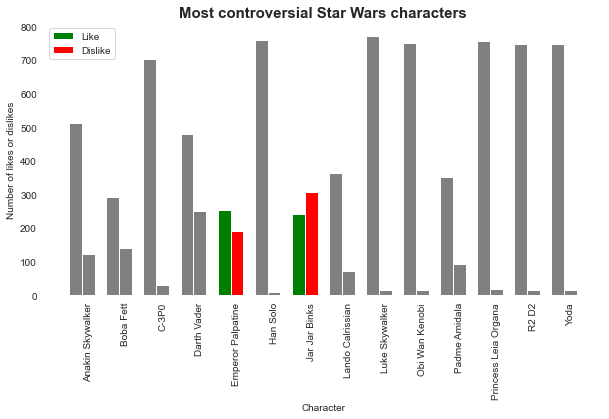

In [101]:
# Now to plot

N = 14 # 14 characters
ind = np.arange(N) #generate the x locations for the groups
width = 0.35 #width for the bars

fig, ax = plt.subplots(figsize=(10,5))
like_bars = ax.bar(ind, like, width, label='Like', color='green')
dislike_bars = ax.bar(ind + width, dislike, width, label='Dislike', color='red')
ax.set_title('Most controversial Star Wars characters', fontweight='bold', fontsize=15)
ax.set(ylabel='Number of likes or dislikes', xlabel='Character',
      xticks=(ind + width))
ax.set_xticklabels(like.index, rotation=90)
ax.legend(loc='upper left')
ax.grid(b=False) #remove grid lines
for key, spine in ax.spines.items(): #remove spines
      spine.set_visible(False)

#Make colours in the barplot stand out for two most controversial characters
for charact in characters.columns:
    if charact not in ['Jar Jar Binks','Emperor Palpatine']:
        loc_dislike = like.index.get_loc(charact) #Find int location of character
        loc_like = like.index.get_loc(charact)        
        like_bars.patches[loc_like].set_facecolor('grey') #set colour of patch
        dislike_bars.patches[loc_dislike].set_facecolor('grey')

So Jar Jar Binks and Emporer Palpatine are the most controversial of the Star Wars characters, with very similar numbers casting votes in favour and against them.

## Exploring the data by demographic segments

We have a number of columns containing demographic information e.g. gender, houshold income, age, education. It would be interesting to see if any patterns emerge through breaking it down by demographic.

## Q5. Do the movie rankings and viewing popularity differ by gender? <a id='q_5'></a>

In [102]:
star_wars['Gender'].value_counts(dropna=False)

Male      423
Female    397
NaN       116
Name: Gender, dtype: int64

In [103]:
#Split the dataframe into two groups
males = star_wars[star_wars['Gender']=='Male']
print(males.shape)
females = star_wars[star_wars['Gender']=='Female']
print(females.shape)

(423, 38)
(397, 38)


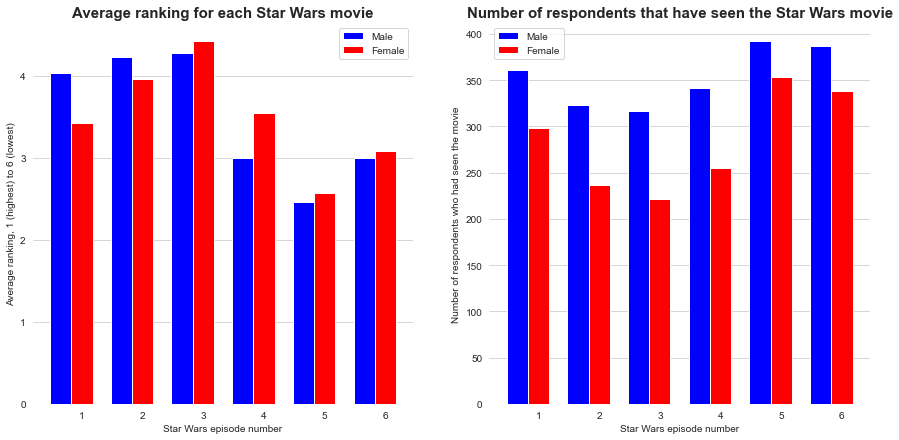

In [104]:
#Graphing the highest average rank and most viewed movie
fig = plt.figure(figsize=(15,7))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

N=6 #6 Star Wars movies
ind=np.arange(N) #generate the x locations for the groups
width = 0.35 #width of the bars
labels = range(1,7,1)

#Average ranking per movie
rects1 = ax1.bar(ind, males[males.columns[9:15]].mean(), width, color='b', label='Male')
rects2 = ax1.bar(ind + width, females[females.columns[9:15]].mean(), width, color='r', label='Female')
ax1.set_title('Average ranking for each Star Wars movie', fontweight='bold', fontsize=15)
ax1.set(ylabel = 'Average ranking, 1 (highest) to 6 (lowest)', xlabel='Star Wars episode number',
      xticks= (ind + width), xticklabels = (labels))
ax1.legend()
ax1.grid(b=None, axis='x')
sns.despine(bottom=True, left=True)

#Total number of viewers
rects3 = ax2.bar(ind, males[males.columns[3:9]].sum(), width, color='b', label='Male')
rects4 = ax2.bar(ind + width, females[females.columns[3:9]].sum(), width, color='r', label='Female')
ax2.set_title('Number of respondents that have seen the Star Wars movie', fontweight='bold', fontsize=15)
ax2.set(ylabel = 'Number of respondents who had seen the movie', xlabel='Star Wars episode number',
      xticks= (ind + width), xticklabels = (labels))
ax2.legend(loc=0)
ax2.grid(b=None, axis='x')
sns.despine(bottom=True, left=True)

Star Wars episode V is the most popular movie for both genders, this is also the movie which has been seen the most. However there are some differences with females, on average, ranking episode 1 more highly than episode 4, whilst the opposite is true for males.

More males than females have seen the latest movies (epsidoes 1-3) and yet males rank these films worse, on average, than females.

## Q6. Are the demographics of fans different from non-fans? <a id='q_6'></a>

Question 2 (*Do you consider yourself to be a fan of the Star Wars film franchise?*) allows us to differentiate self-identified Star Wars fans from non-fans. It'd be interesting to see if there are any interesting demographic patterns between these groups.

In [105]:
# Firstly check the demographic columns that we will use
#print(star_wars.columns.get_loc('Gender')) find the 1st column's loc

col_list = list(range(33,38))

for col in col_list:
    print(star_wars.columns[col])
    print(star_wars[star_wars.columns[col]].value_counts(dropna=False))
    print('\n')

Gender
Male      423
Female    397
NaN       116
Name: Gender, dtype: int64


Age
45-60    240
30-44    207
> 60     193
18-29    180
NaN      116
Name: Age, dtype: int64


Household Income
NaN                    261
$50,000 - $99,999      238
$25,000 - $49,999      147
$100,000 - $149,999    115
$0 - $24,999            98
$150,000+               77
Name: Household Income, dtype: int64


Education
Bachelor degree                     262
Some college or Associate degree    254
Graduate degree                     226
NaN                                 120
High school degree                   71
Less than high school degree          3
Name: Education, dtype: int64


Location (Census Region)
Pacific               146
East North Central    134
South Atlantic        133
NaN                   118
Middle Atlantic        93
West South Central     76
West North Central     76
Mountain               68
New England            60
East South Central     32
Name: Location (Census Region), dtype: int

It's noticeable that for both Gender and Age there are 116 NaN values, and similar numbers for other columns. This is worth looking into as it's more likely to be the same respondents submitting NaN values for each column.

In [106]:
# Identifying the NaN responses for Gender.
missing_gender = star_wars['Gender'].isnull()
star_wars[missing_gender].head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6,Han Solo,Luke Skywalker,...,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
9,3.292638e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,3.291669e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,3.291570e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,3.291470e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,3.291420e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,3.291406e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3.291341e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,3.291038e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,3.291022e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,3.291007e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that there are a number of survey responses where the respondent has answered 'True' to Q1 (having seen any of the 6 Star Wars films) but have then proceeded to not fill in the survey. More surprisingly it appears some have not seen any of the Star Wars films based upon their responses, but have still answered True for Q1, an obvious contradiction.

In [107]:
"""Checking how many respondents answered that they have seen a Star Wars
when they haven't selected which ones"""

def film_count(row):
    number_films = 0
    film_cols = ['seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4',
                'seen_ep5', 'seen_ep6']
    for col in film_cols:
        val = row[col]
        if val == True:
            number_films +=1
        else:
            continue
    return number_films

#Now apply the function to the df and record result in new column
star_wars['Number of films seen'] = star_wars.apply(film_count, axis=1)

star_wars['Number of films seen'].value_counts(dropna=False)

6    471
0    101
3     99
2     85
4     72
1     56
5     52
Name: Number of films seen, dtype: int64

So 101 of the respondents did not select a single Star Wars film that they have seen, despite answering 'Yes' to Q1. This is a valuable reminder to verify the accuracy of survey reeponses earlier on in the ETL stage!

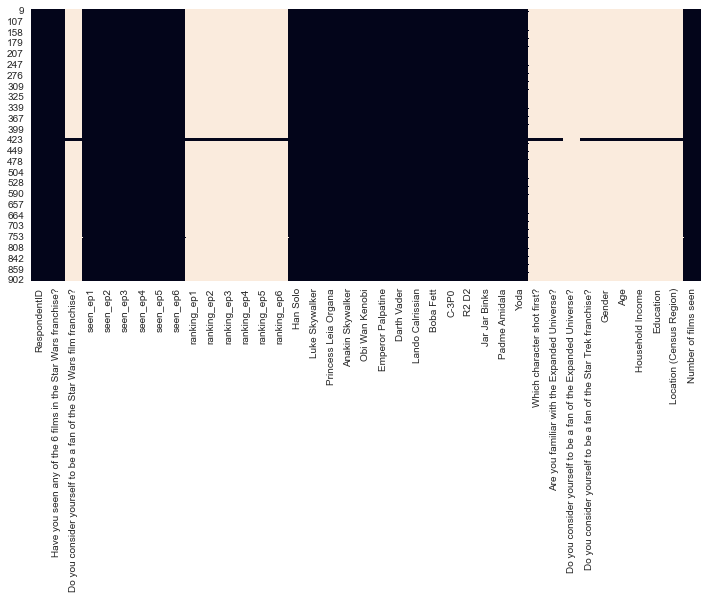

In [108]:
#Looking at what has been filled in by these survey respondents
no_films = star_wars[star_wars['Number of films seen'] == 0]
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(no_films.isnull(), cbar=False)

So it appears that many of the columns have not been filled in by these survey respondents (the columns with a light pink colour). Despite not having selected any of the Star Wars films that they've seen, many have ranked the films and filled in demographic information. However, these entries could be False or No values so to check:

In [109]:
for cols in no_films.columns[1:]:
    print(cols, no_films[cols].unique(), '\n')

Have you seen any of the 6 films in the Star Wars franchise? [ True] 

Do you consider yourself to be a fan of the Star Wars film franchise? [nan False] 

seen_ep1 [False] 

seen_ep2 [False] 

seen_ep3 [False] 

seen_ep4 [False] 

seen_ep5 [False] 

seen_ep6 [False] 

ranking_ep1 [nan  2.] 

ranking_ep2 [nan  3.] 

ranking_ep3 [nan  4.] 

ranking_ep4 [nan  5.] 

ranking_ep5 [nan  1.] 

ranking_ep6 [nan  6.] 

Han Solo [0.] 

Luke Skywalker [0. 2.] 

Princess Leia Organa [0.] 

Anakin Skywalker [0.] 

Obi Wan Kenobi [0.] 

Emperor Palpatine [0.] 

Darth Vader [0. 2.] 

Lando Calrissian [0.] 

Boba Fett [0.] 

C-3P0 [0.] 

R2 D2 [0.] 

Jar Jar Binks [0.] 

Padme Amidala [0.] 

Yoda [0.] 

Which character shot first? [nan "I don't understand this question"] 

Are you familiar with the Expanded Universe? [nan False] 

Do you consider yourself to be a fan of the Expanded Universe? [nan] 

Do you consider yourself to be a fan of the Star Trek franchise? [nan False] 

Gender [nan 'Male'] 

Ag

So  a lot of the entries in each column are not useful for analysis. 

Overall, it appears that some survey respondents answered 'Yes' to the first question but then didn't proceed to complete the rest of the survey. This could be due to a lack of time or interest. Their responses can be removed from the dataframe.

In [110]:
#Removing these erroneous responses
print('The old dataframe has {0} rows.'.format(star_wars.shape[0]))

star_wars = star_wars[star_wars['Number of films seen'] != 0]

print('The revised dataframe has {0} rows'.format(star_wars.shape[0]))

The old dataframe has 936 rows.
The revised dataframe has 835 rows


Now to look at the demographic columns again:

In [111]:
col_list = list(range(33,38))

for col in col_list:
    print(star_wars.columns[col])
    print(star_wars[star_wars.columns[col]].value_counts(dropna=False), '\n')

Gender
Male      422
Female    397
NaN        16
Name: Gender, dtype: int64 

Age
45-60    240
30-44    207
> 60     192
18-29    180
NaN       16
Name: Age, dtype: int64 

Household Income
$50,000 - $99,999      238
NaN                    161
$25,000 - $49,999      146
$100,000 - $149,999    115
$0 - $24,999            98
$150,000+               77
Name: Household Income, dtype: int64 

Education
Bachelor degree                     261
Some college or Associate degree    254
Graduate degree                     226
High school degree                   71
NaN                                  20
Less than high school degree          3
Name: Education, dtype: int64 

Location (Census Region)
Pacific               146
East North Central    133
South Atlantic        133
Middle Atlantic        93
West South Central     76
West North Central     76
Mountain               68
New England            60
East South Central     32
NaN                    18
Name: Location (Census Region), dtype: int

Now there are only 16 NaN values for Gender and Age. For Household Income there are 161 NaN values, but this is a sensitive question so a lower response rate for it is unsurprising.

The remaining rows with NaN values will not be removed (as it could cause a loss of other valuable information) and so analysis will proceed with the awareness that demographic information is missing for some respondents.

** Now to continue with the demographic analysis of fans and non-fans **

In [112]:
#Create two dataframes, one for fans and one for non-fans

print('The shape of the original dataframe is {0}'.format(star_wars.shape))

fans = star_wars[star_wars[star_wars.columns[2]] == True]

not_fans = star_wars[star_wars[star_wars.columns[2]] == False]

print('The shape of the fans dataframe is {0}'.format(fans.shape))
print('The shape of the not fans dataframe is {0}'.format(not_fans.shape))


The shape of the original dataframe is (835, 39)
The shape of the fans dataframe is (552, 39)
The shape of the not fans dataframe is (283, 39)


In [113]:
# Define a function to find the frequency of each demographic category

def category_df(df, column, xlabel):
    categories = df[column].unique().tolist() #Get a list of categories
    categories = [c for c in categories if pd.isnull(c) == False] #Remove NaN
    # Now count number of instances of each category in column
    # and place in a dictionary
    cat_dict = {}
    for cat in categories:
        freq = sum(df[column] == cat)
        cat_dict[cat] = freq
    cat_df = pd.DataFrame(list(cat_dict.items())) #Turn dictionary into df
    xlabel = str(xlabel)
    cat_df = cat_df.rename(columns={0:'Category', 1:xlabel}) #Name cols
    cat_df = cat_df.set_index('Category') #Set df index
    #Transpose to make plotting easier
    cat_df = cat_df.T
    #Sort columns of df so that easier to read bar plots
    cat_df.sort_index(ascending=True, inplace=True, axis=1)
    #Work out % for each category using df.apply
    stacked_data = cat_df.apply(lambda x: x*100/sum(x), axis=1)
    return stacked_data

In [114]:
# Now define a function to plot the stacked bar chats for fans and non-fans

def plot_filled_bar(df1, df2, figsize, title, ylabel):
    df_plot = pd.concat([df1, df2]) #Concat so can plot side by side
    ax = df_plot.plot(kind='bar', stacked=True, figsize=figsize, cmap='Paired')
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontweight='bold', fontsize=15)
    sns.despine(left=True)
    #Set legend to below x axis i.e. negative y coordinate
    ax.legend(fontsize=10, bbox_to_anchor=(0.3,-0.1), frameon=False)
    # .patches is everything inside of the chart
    for rect in ax.patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
        label_text = '{:.1f}'.format(height)
    
    # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
    
    # only plot labels greater than given height
        if height > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, fontweight='bold')
    
    plt.show()
    return ''

Now to graph and compare the demographic categories between fans and non-fans.

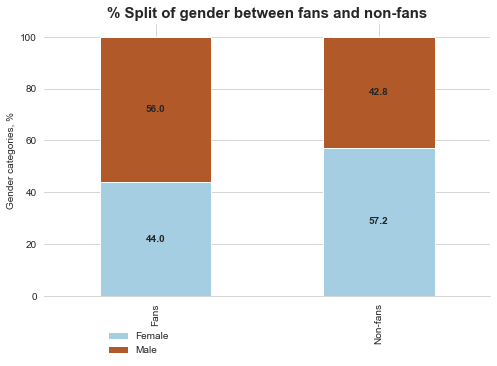

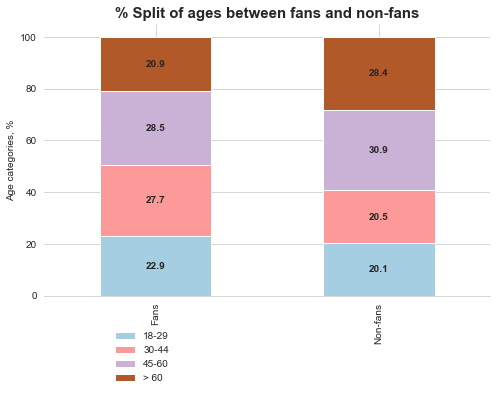

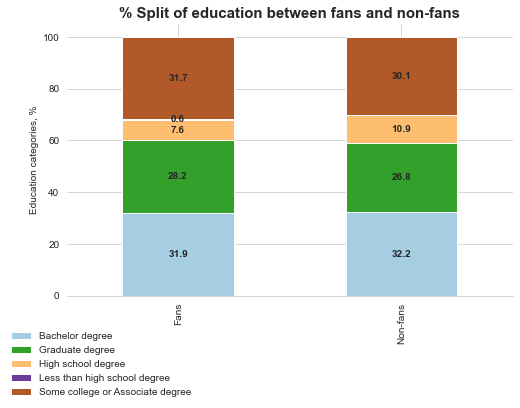

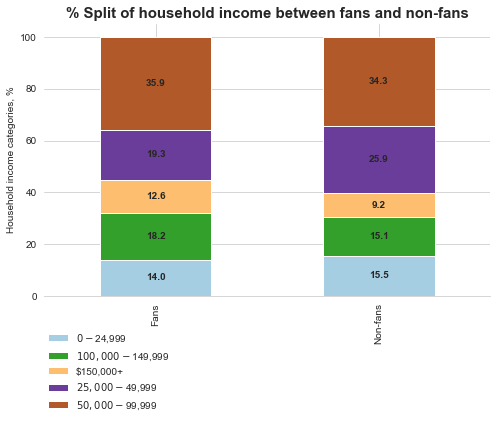

''

In [115]:
gender_fans = category_df(fans, 'Gender', 'Fans')
gender_non_fans = category_df(not_fans, 'Gender', 'Non-fans')
age_fans = category_df(fans, 'Age', 'Fans')
age_non_fans = category_df(not_fans, 'Age', 'Non-fans')
education_fans = category_df(fans, 'Education', 'Fans')
education_non_fans = category_df(not_fans, 'Education', 'Non-fans')
income_fans = category_df(fans, 'Household Income', 'Fans')
income_non_fans = category_df(not_fans, 'Household Income', 'Non-fans')

plot_filled_bar(df1=gender_fans,
               df2=gender_non_fans,
               figsize=(8,5),
               title='% Split of gender between fans and non-fans',
               ylabel='Gender categories, %')

plot_filled_bar(df1=age_fans,
               df2=age_non_fans,
               figsize=(8,5),
               title='% Split of ages between fans and non-fans',
               ylabel='Age categories, %')

plot_filled_bar(df1=education_fans,
               df2=education_non_fans,
               figsize=(8,5),
               title='% Split of education between fans and non-fans',
               ylabel='Education categories, %')

plot_filled_bar(df1=income_fans,
               df2=income_non_fans,
               figsize=(8,5),
               title='% Split of household income between fans and non-fans',
               ylabel='Household income categories, %')

So looking at the patterns in demographics between self-identified Star Wars fans and non-fans:

**Gender**
Fans are more likely to be male than female.

**Age**
Fans are younger, with a greater proportion aged between 18-44.

**Education**
Fans are slightly more likely to have a graduate degree, and less likely to have just a high school degree, but the difference is slight.

**Household Income**
A greater proportion of fans live in households with incomes of over $100,000.

## Concluding remarks

FiveThirtyEight's initial hypothesis that Star Wars Episode V is the most popular film was correct. Of those who had seen Star Wars, the older films (episodes 4-6) were the most popular. 

Going forwards it would be interesting to see how the latest Star Wars films compare, and whether younger audiences (who may never of seen the original movies) rank the latest movies more highly, than older fans.